# Distributions
Generating various multidimensional distributions using pure Python without PyTorch


In [1]:
import numpy as np
from vbi import BoxUniform
import matplotlib.pyplot as plt

Example usage of the `BoxUniform` distribution class.
This demonstrates how to use the pure `numpy/scipy` implementation
of a multivariate uniform distribution over a hyperrectangle.

It works equivalent to BoxUniform from `sbi.utils`

```py

from sbi.utils import BoxUniform
num_dim = 3
prior = BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))
num_simulations = 20000
theta = prior.sample((num_simulations,))

```

BoxUniform Distribution Example

1. One-dimensional uniform distribution
Distribution: U(0, 5)
Mean: 2.500 (expected: 2.5)
Std: 1.443 (expected: 1.443)
Sample mean: 2.482
Sample std: 1.468
Sample dtype: float64

2. Two-dimensional uniform distribution with different dtypes
Float64 distribution: BoxUniform(low=[-1. -2.], high=[3. 1.], dtype=<class 'numpy.float64'>)
Float32 distribution: BoxUniform(low=[-1. -2.], high=[3. 1.], dtype=<class 'numpy.float32'>)
Float64 samples dtype: float64
Float32 samples dtype: float32
Memory usage - Float64: 16000 bytes
Memory usage - Float32: 8000 bytes
Memory ratio: 2.0x
Distribution: U([-1, -2], [3, 1])
Mean: [ 1.  -0.5]
Std: [1.15470054 0.8660254 ]
Volume: 12.0

3. Probability calculations
Point [ 1.  -0.5]: prob_64=0.083333, prob_32=0.083333
             log_prob_64=-2.485, log_prob_32=-2.485
Point [4. 0.]: prob_64=0.000000, prob_32=0.000000
             log_prob_64=-inf, log_prob_32=-inf
Point [0. 2.]: prob_64=0.000000, prob_32=0.000000
           


BoxUniform example completed successfully!


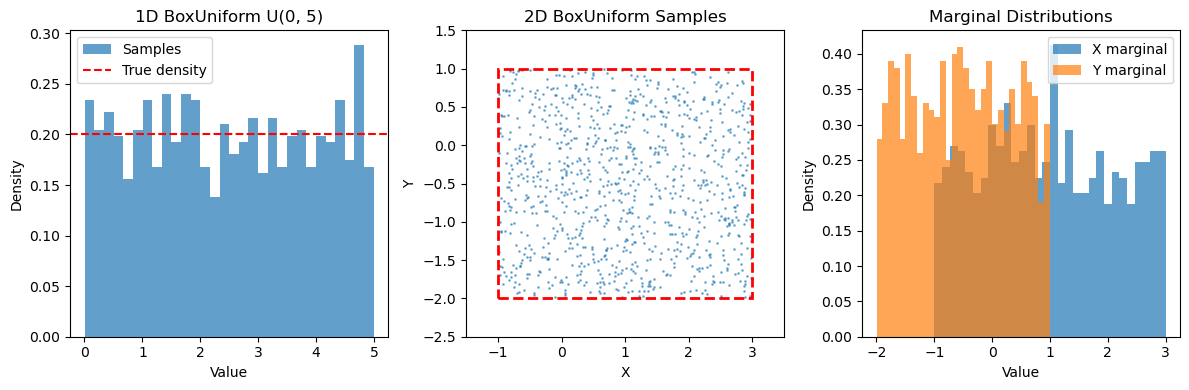

In [2]:
"""Demonstrate BoxUniform usage."""
print("BoxUniform Distribution Example")
print("=" * 40)

# 1D Example
print("\n1. One-dimensional uniform distribution")
dist_1d = BoxUniform(low=0, high=5)
samples_1d = dist_1d.sample(1000)

print(f"Distribution: U(0, 5)")
print(f"Mean: {dist_1d.mean()[0]:.3f} (expected: 2.5)")
print(f"Std: {dist_1d.std()[0]:.3f} (expected: {5/np.sqrt(12):.3f})")
print(f"Sample mean: {samples_1d.mean():.3f}")
print(f"Sample std: {samples_1d.std():.3f}")
print(f"Sample dtype: {samples_1d.dtype}")

# 2D Example with different dtypes
print("\n2. Two-dimensional uniform distribution with different dtypes")

# Float64 (default)
dist_2d_64 = BoxUniform(low=[-1, -2], high=[3, 1])
samples_2d_64 = dist_2d_64.sample(1000)

# Float32
dist_2d_32 = BoxUniform(low=[-1, -2], high=[3, 1], dtype=np.float32)
samples_2d_32 = dist_2d_32.sample(1000)

print(f"Float64 distribution: {dist_2d_64}")
print(f"Float32 distribution: {dist_2d_32}")
print(f"Float64 samples dtype: {samples_2d_64.dtype}")
print(f"Float32 samples dtype: {samples_2d_32.dtype}")
print(f"Memory usage - Float64: {samples_2d_64.nbytes} bytes")
print(f"Memory usage - Float32: {samples_2d_32.nbytes} bytes")
print(f"Memory ratio: {samples_2d_64.nbytes / samples_2d_32.nbytes:.1f}x")
dist_2d = BoxUniform(low=[-1, -2], high=[3, 1])
samples_2d = dist_2d.sample(1000)

print(f"Distribution: U([-1, -2], [3, 1])")
print(f"Mean: {dist_2d.mean()}")
print(f"Std: {dist_2d.std()}")
print(f"Volume: {dist_2d.volume}")

# Probability calculations
print("\n3. Probability calculations")
test_points = np.array([
    [1, -0.5],  # Inside
    [4, 0],     # Outside (x too large)
    [0, 2],     # Outside (y too large)
])

for i, point in enumerate(test_points):
    prob_64 = dist_2d_64.prob(point)
    prob_32 = dist_2d_32.prob(point)
    log_prob_64 = dist_2d_64.log_prob(point)
    log_prob_32 = dist_2d_32.log_prob(point)
    print(f"Point {point}: prob_64={prob_64:.6f}, prob_32={prob_32:.6f}")
    print(f"             log_prob_64={log_prob_64:.3f}, log_prob_32={log_prob_32:.3f}")

# CDF calculations
print("\n4. CDF calculations")
cdf_points = np.array([
    [-1, -2],   # Lower corner
    [3, 1],     # Upper corner  
    [1, -0.5],  # Middle point
])

for point in cdf_points:
    cdf_64 = dist_2d_64.cdf(point)
    cdf_32 = dist_2d_32.cdf(point)
    print(f"CDF at {point}: float64={cdf_64:.6f}, float32={cdf_32:.6f}")

# Visualization (optional - requires matplotlib)
try:
    plt.figure(figsize=(12, 4))
    
    # 1D histogram
    plt.subplot(1, 3, 1)
    plt.hist(samples_1d.flatten(), bins=30, density=True, alpha=0.7, label='Samples')
    plt.axhline(y=1/5, color='red', linestyle='--', label='True density')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('1D BoxUniform U(0, 5)')
    plt.legend()
    
    # 2D scatter plot
    plt.subplot(1, 3, 2)
    plt.scatter(samples_2d[:, 0], samples_2d[:, 1], alpha=0.5, s=1)
    plt.xlim(-1.5, 3.5)
    plt.ylim(-2.5, 1.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D BoxUniform Samples')
    
    # Add rectangle showing the bounds
    from matplotlib.patches import Rectangle
    rect = Rectangle((-1, -2), 4, 3, linewidth=2, edgecolor='red', 
                    facecolor='none', linestyle='--')
    plt.gca().add_patch(rect)
    
    # Marginal distributions
    plt.subplot(1, 3, 3)
    plt.hist(samples_2d[:, 0], bins=30, density=True, alpha=0.7, 
            label='X marginal')
    plt.hist(samples_2d[:, 1], bins=30, density=True, alpha=0.7, 
            label='Y marginal')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Marginal Distributions')
    plt.legend()
    plt.tight_layout()
    
except ImportError:
    print("\n5. Matplotlib not available - skipping visualization")

print("\nBoxUniform example completed successfully!")

In [3]:
low = [0, -1, 0, 0]
high = [1, 1, 1, 1]
dist_4d = BoxUniform(low=low, high=high)
samples_4d = dist_4d.sample(1000)
print(f"\n4D BoxUniform U({low}, {high})")
print(f"Mean: {dist_4d.mean()}")
print(f"Std: {dist_4d.std()}")
print(f"Volume: {dist_4d.volume}")
print(f"sample shape: {samples_4d.shape}")
print(f"sample dtype: {samples_4d.dtype}")


4D BoxUniform U([0, -1, 0, 0], [1, 1, 1, 1])
Mean: [0.5 0.  0.5 0.5]
Std: [0.28867513 0.57735027 0.28867513 0.28867513]
Volume: 2.0
sample shape: (1000, 4)
sample dtype: float64


In [4]:
from vbi import BoxUniform
num_dim = 3
prior = BoxUniform(low=-2 * (num_dim), high=2 * (num_dim))
num_simulations = 20000
theta = prior.sample((num_simulations,))
theta.shape

(20000, 1)